In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Load the dataset
file_path = 'googleplaystore.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [6]:
# Check the data types of each column
df.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# Identify rows where 'Installs' cannot be converted to numeric
invalid_installs = df['Installs'].str.contains('^[a-zA-Z]', regex=True)
invalid_installs_rows = df[invalid_installs]

# Remove these rows
df_cleaned = df[~invalid_installs]

# Attempt conversion again
df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

# Recheck the data types and the cleaned data
df_cleaned.dtypes, df_cleaned.head(), invalid_installs_rows

(Unnamed: 0          int64
 App                object
 Category           object
 Rating            float64
 Reviews            object
 Size               object
 Installs          float64
 Type               object
 Price              object
 Content Rating     object
 Genres             object
 Last Updated       object
 Current Ver        object
 Android Ver        object
 dtype: object,
    Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating Reviews  Size    Installs  Type Price  \
 0  ART_AND_DESIGN     4.1     159   19M     10000.0  Free     0   
 1  ART_AND_DESIGN     3.9     967   14M    500000.0  

In [8]:
# Correct 'Price' conversion (ensure no non-numeric values are present)
df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '', regex=False).astype(float)

# Convert 'Last Updated' to datetime format
df_cleaned['Last Updated'] = pd.to_datetime(df_cleaned['Last Updated'], errors='coerce', format='%d-%b-%y')

# Final check on data types and a sample of the cleaned data
df_cleaned.dtypes, df_cleaned.head()

(Unnamed: 0                 int64
 App                       object
 Category                  object
 Rating                   float64
 Reviews                   object
 Size                      object
 Installs                 float64
 Type                      object
 Price                    float64
 Content Rating            object
 Genres                    object
 Last Updated      datetime64[ns]
 Current Ver               object
 Android Ver               object
 dtype: object,
    Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating Reviews  Size    Installs  Type  Price  \
 0  ART_AND_DESIGN     

In [9]:
# EDA: Exploratory Data Analysis

# Check for missing values
missing_values = df_cleaned.isnull().sum()

# Statistical summary of numeric columns
statistical_summary = df_cleaned.describe()

missing_values, statistical_summary

(Unnamed: 0           0
 App                  0
 Category             0
 Rating            1474
 Reviews              0
 Size                 0
 Installs             0
 Type                 1
 Price                0
 Content Rating       0
 Genres               0
 Last Updated         0
 Current Ver          8
 Android Ver          2
 dtype: int64,
          Unnamed: 0       Rating      Installs         Price
 count  10840.000000  9366.000000  1.084000e+04  10840.000000
 mean    5419.533948     4.191757  1.546434e+07      1.027368
 std     3129.439605     0.515219  8.502936e+07     15.949703
 min        0.000000     1.000000  0.000000e+00      0.000000
 25%     2709.750000     4.000000  1.000000e+03      0.000000
 50%     5419.500000     4.300000  1.000000e+05      0.000000
 75%     8129.250000     4.500000  5.000000e+06      0.000000
 max    10840.000000     5.000000  1.000000e+09    400.000000)

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

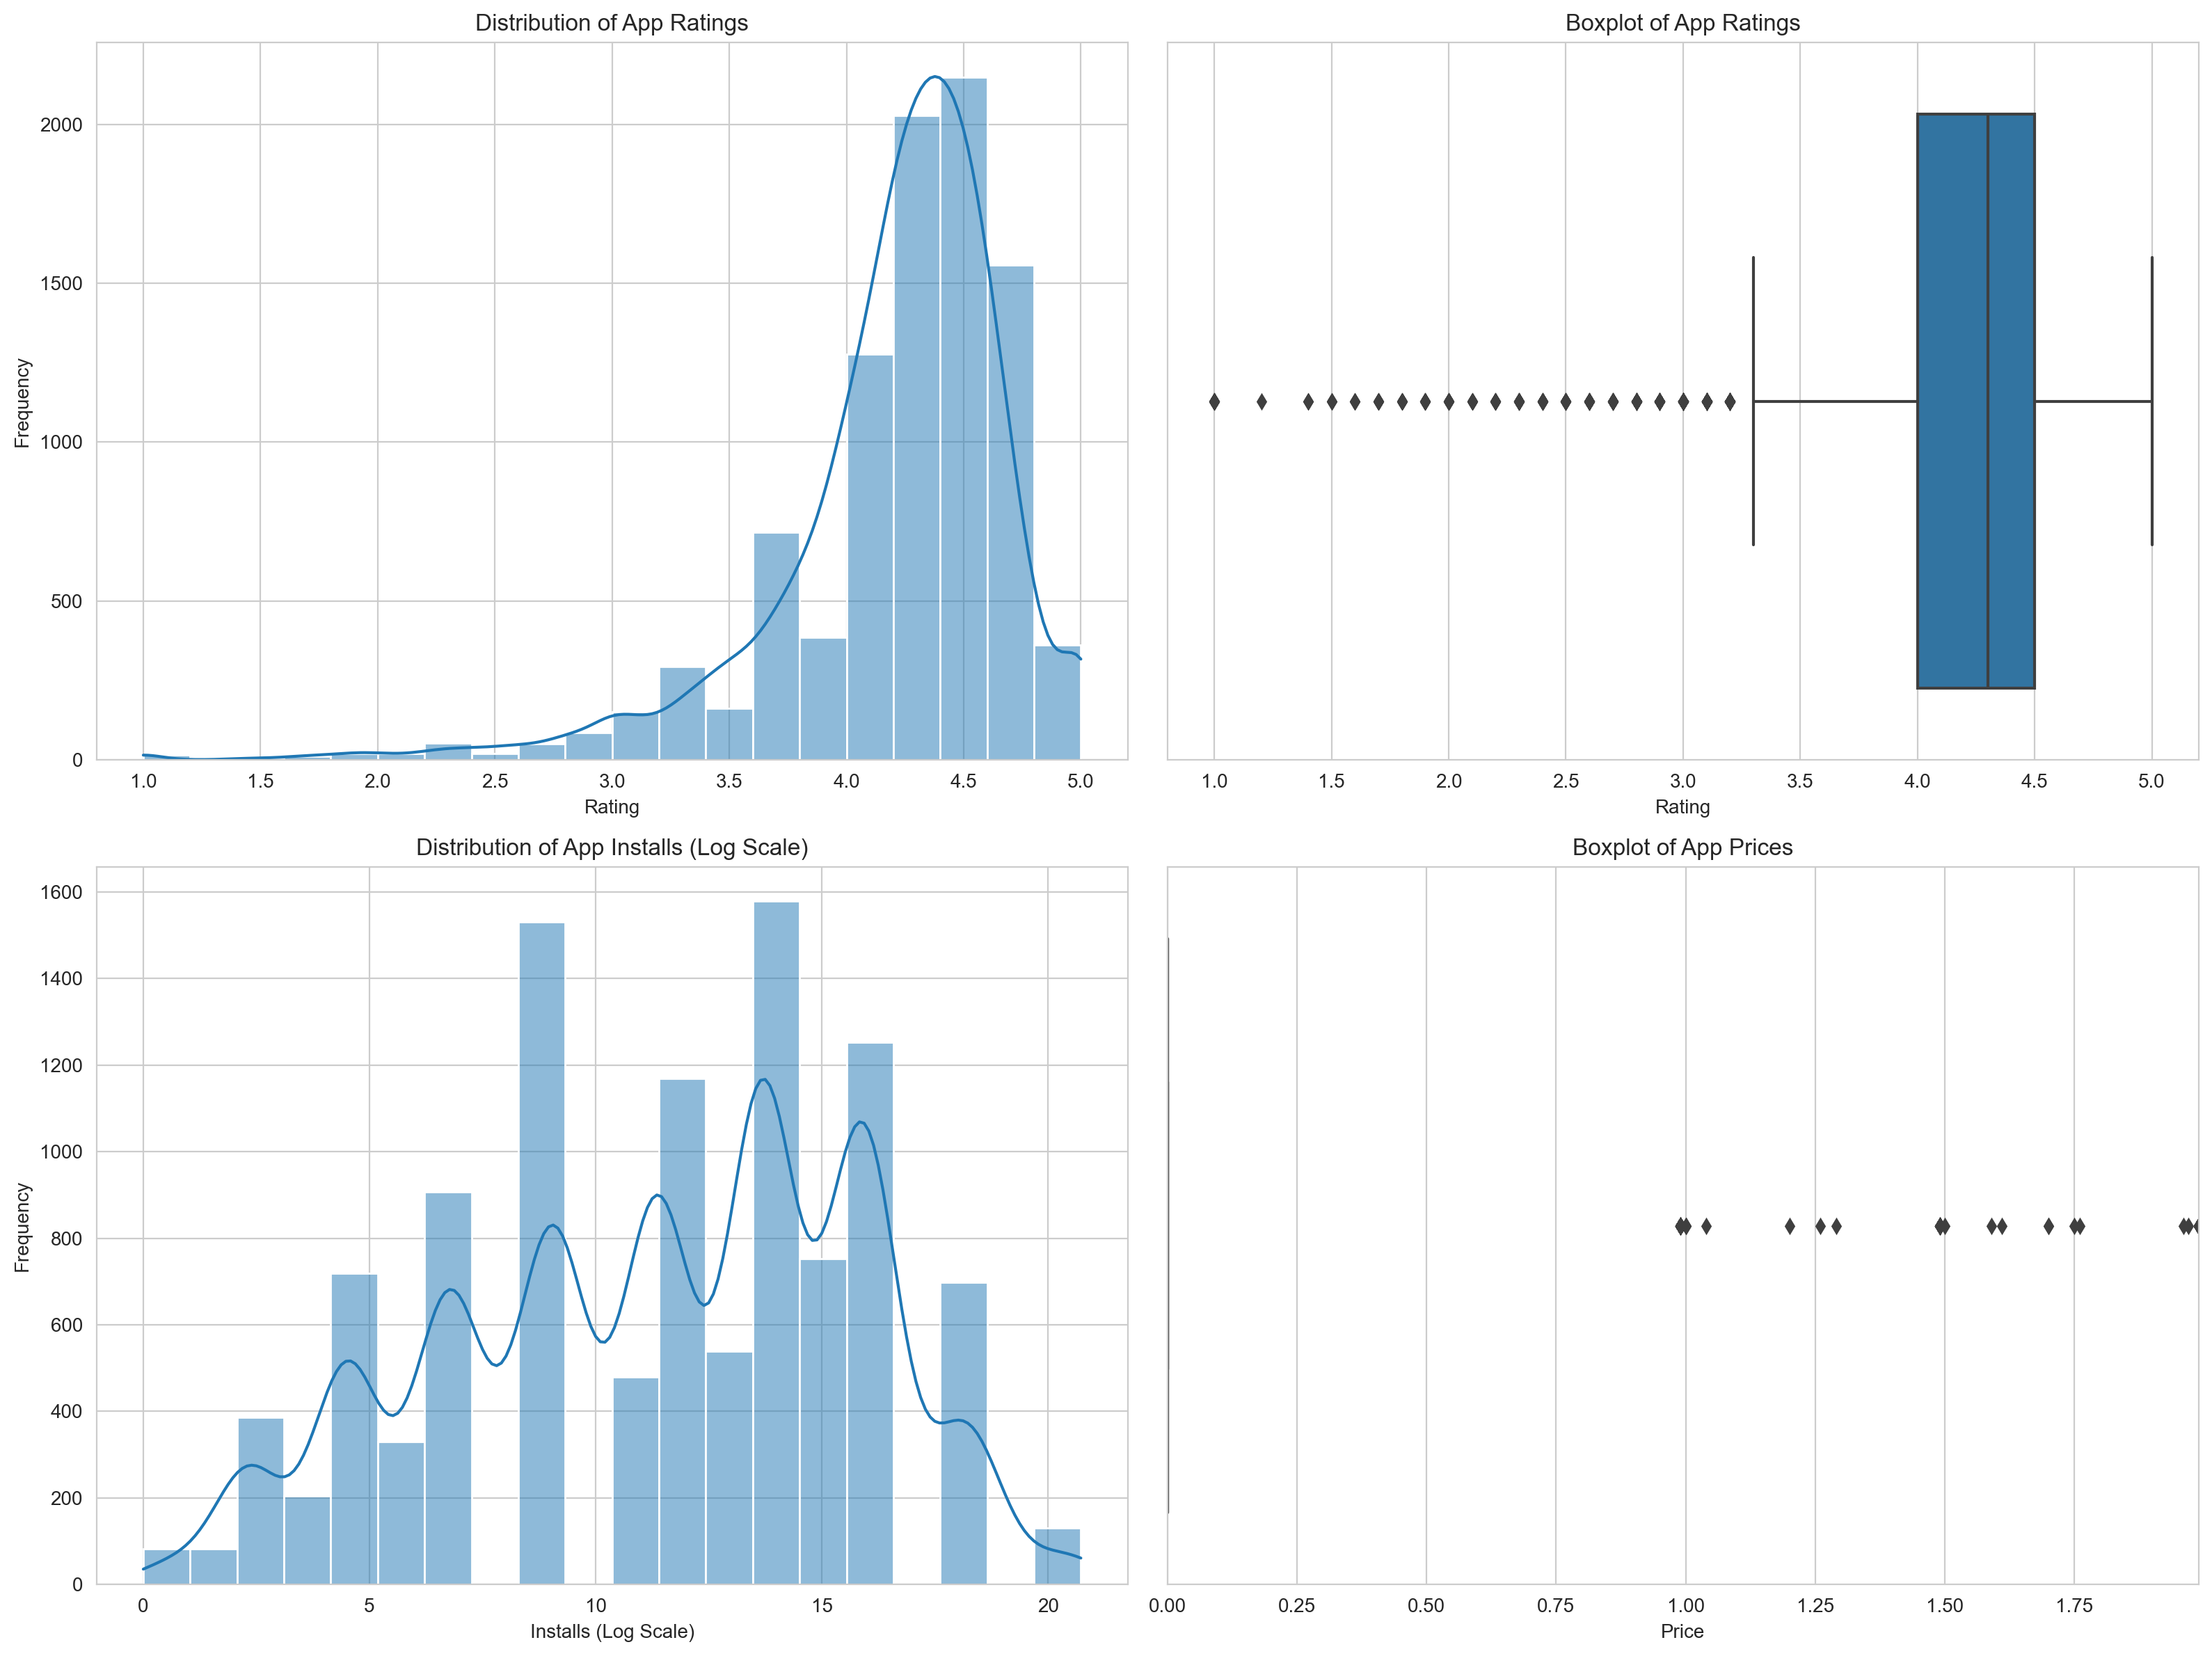

In [11]:
# apply the log transformation with NumPy
df_cleaned['Installs_log'] = df_cleaned['Installs'].apply(lambda x: np.log(x + 1))

# Re-plot the adjusted visualizations
fig, ax = plt.subplots(2, 2, figsize=(16, 12), dpi=200)

# Histogram of App Ratings
sns.histplot(df_cleaned['Rating'].dropna(), bins=20, kde=True, ax=ax[0, 0])  # Drop NA values for clean plotting
ax[0, 0].set_title('Distribution of App Ratings')
ax[0, 0].set_xlabel('Rating')
ax[0, 0].set_ylabel('Frequency')

# Boxplot of App Ratings
sns.boxplot(x='Rating', data=df_cleaned, ax=ax[0, 1])
ax[0, 1].set_title('Boxplot of App Ratings')
ax[0, 1].set_xlabel('Rating')

# Histogram of App Installs (Using Log-Transformed Data)
sns.histplot(df_cleaned['Installs_log'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of App Installs (Log Scale)')
ax[1, 0].set_xlabel('Installs (Log Scale)')
ax[1, 0].set_ylabel('Frequency')

# Boxplot of App Prices (Adjusting for visualization)
sns.boxplot(x='Price', data=df_cleaned, ax=ax[1, 1])
ax[1, 1].set_title('Boxplot of App Prices')
ax[1, 1].set_xlabel('Price')
ax[1, 1].set_xlim(0, df_cleaned['Price'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization

plt.tight_layout()
plt.show()

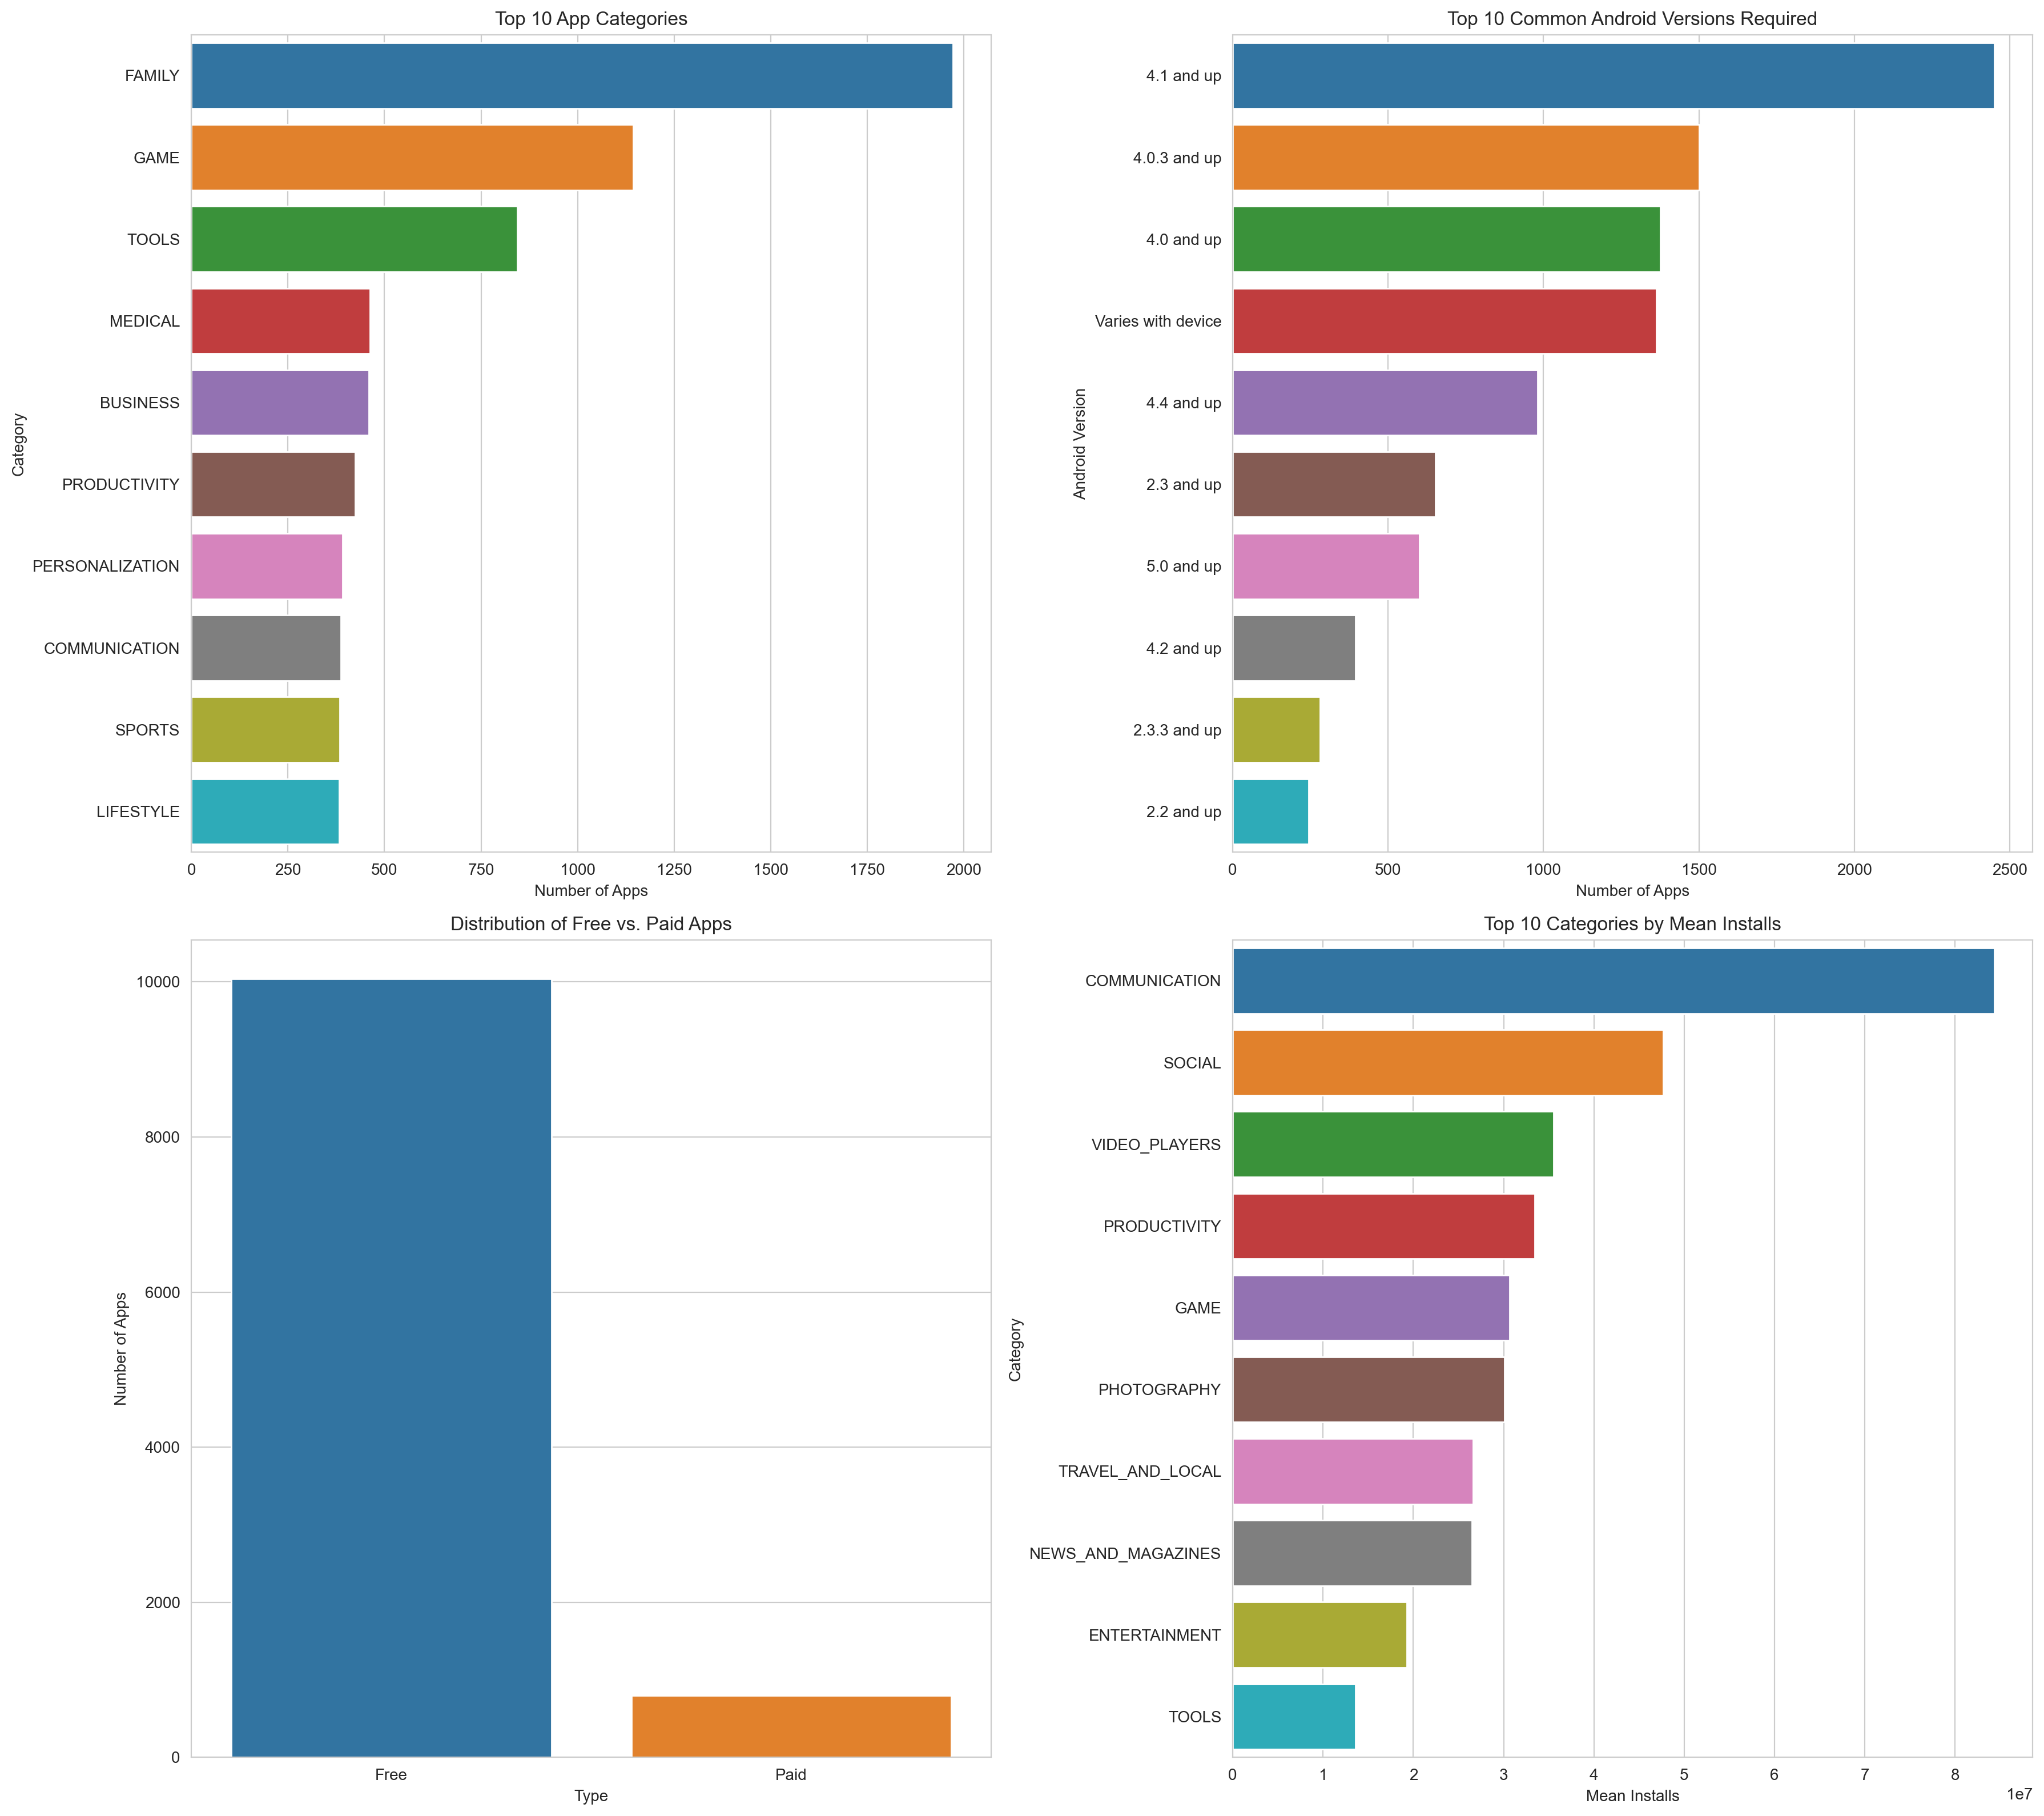

In [12]:
# Visualization setup
fig, ax = plt.subplots(2, 2, figsize=(18, 16), dpi=200)

# Top Categories
top_categories = df_cleaned['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax[0, 0])
ax[0, 0].set_title('Top 10 App Categories')
ax[0, 0].set_xlabel('Number of Apps')
ax[0, 0].set_ylabel('Category')

# Common Android Versions Required
common_android_versions = df_cleaned['Android Ver'].value_counts().head(10)
sns.barplot(x=common_android_versions.values, y=common_android_versions.index, ax=ax[0, 1])
ax[0, 1].set_title('Top 10 Common Android Versions Required')
ax[0, 1].set_xlabel('Number of Apps')
ax[0, 1].set_ylabel('Android Version')

# Free vs. Paid Apps Distribution
free_vs_paid = df_cleaned['Type'].value_counts()
sns.barplot(x=free_vs_paid.index, y=free_vs_paid.values, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Free vs. Paid Apps')
ax[1, 0].set_xlabel('Type')
ax[1, 0].set_ylabel('Number of Apps')

# Install Ranges per Category - Mean Installs
mean_installs_per_category = df_cleaned.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=mean_installs_per_category.values, y=mean_installs_per_category.index, ax=ax[1, 1])
ax[1, 1].set_title('Top 10 Categories by Mean Installs')
ax[1, 1].set_xlabel('Mean Installs')
ax[1, 1].set_ylabel('Category')

plt.tight_layout()
plt.show()

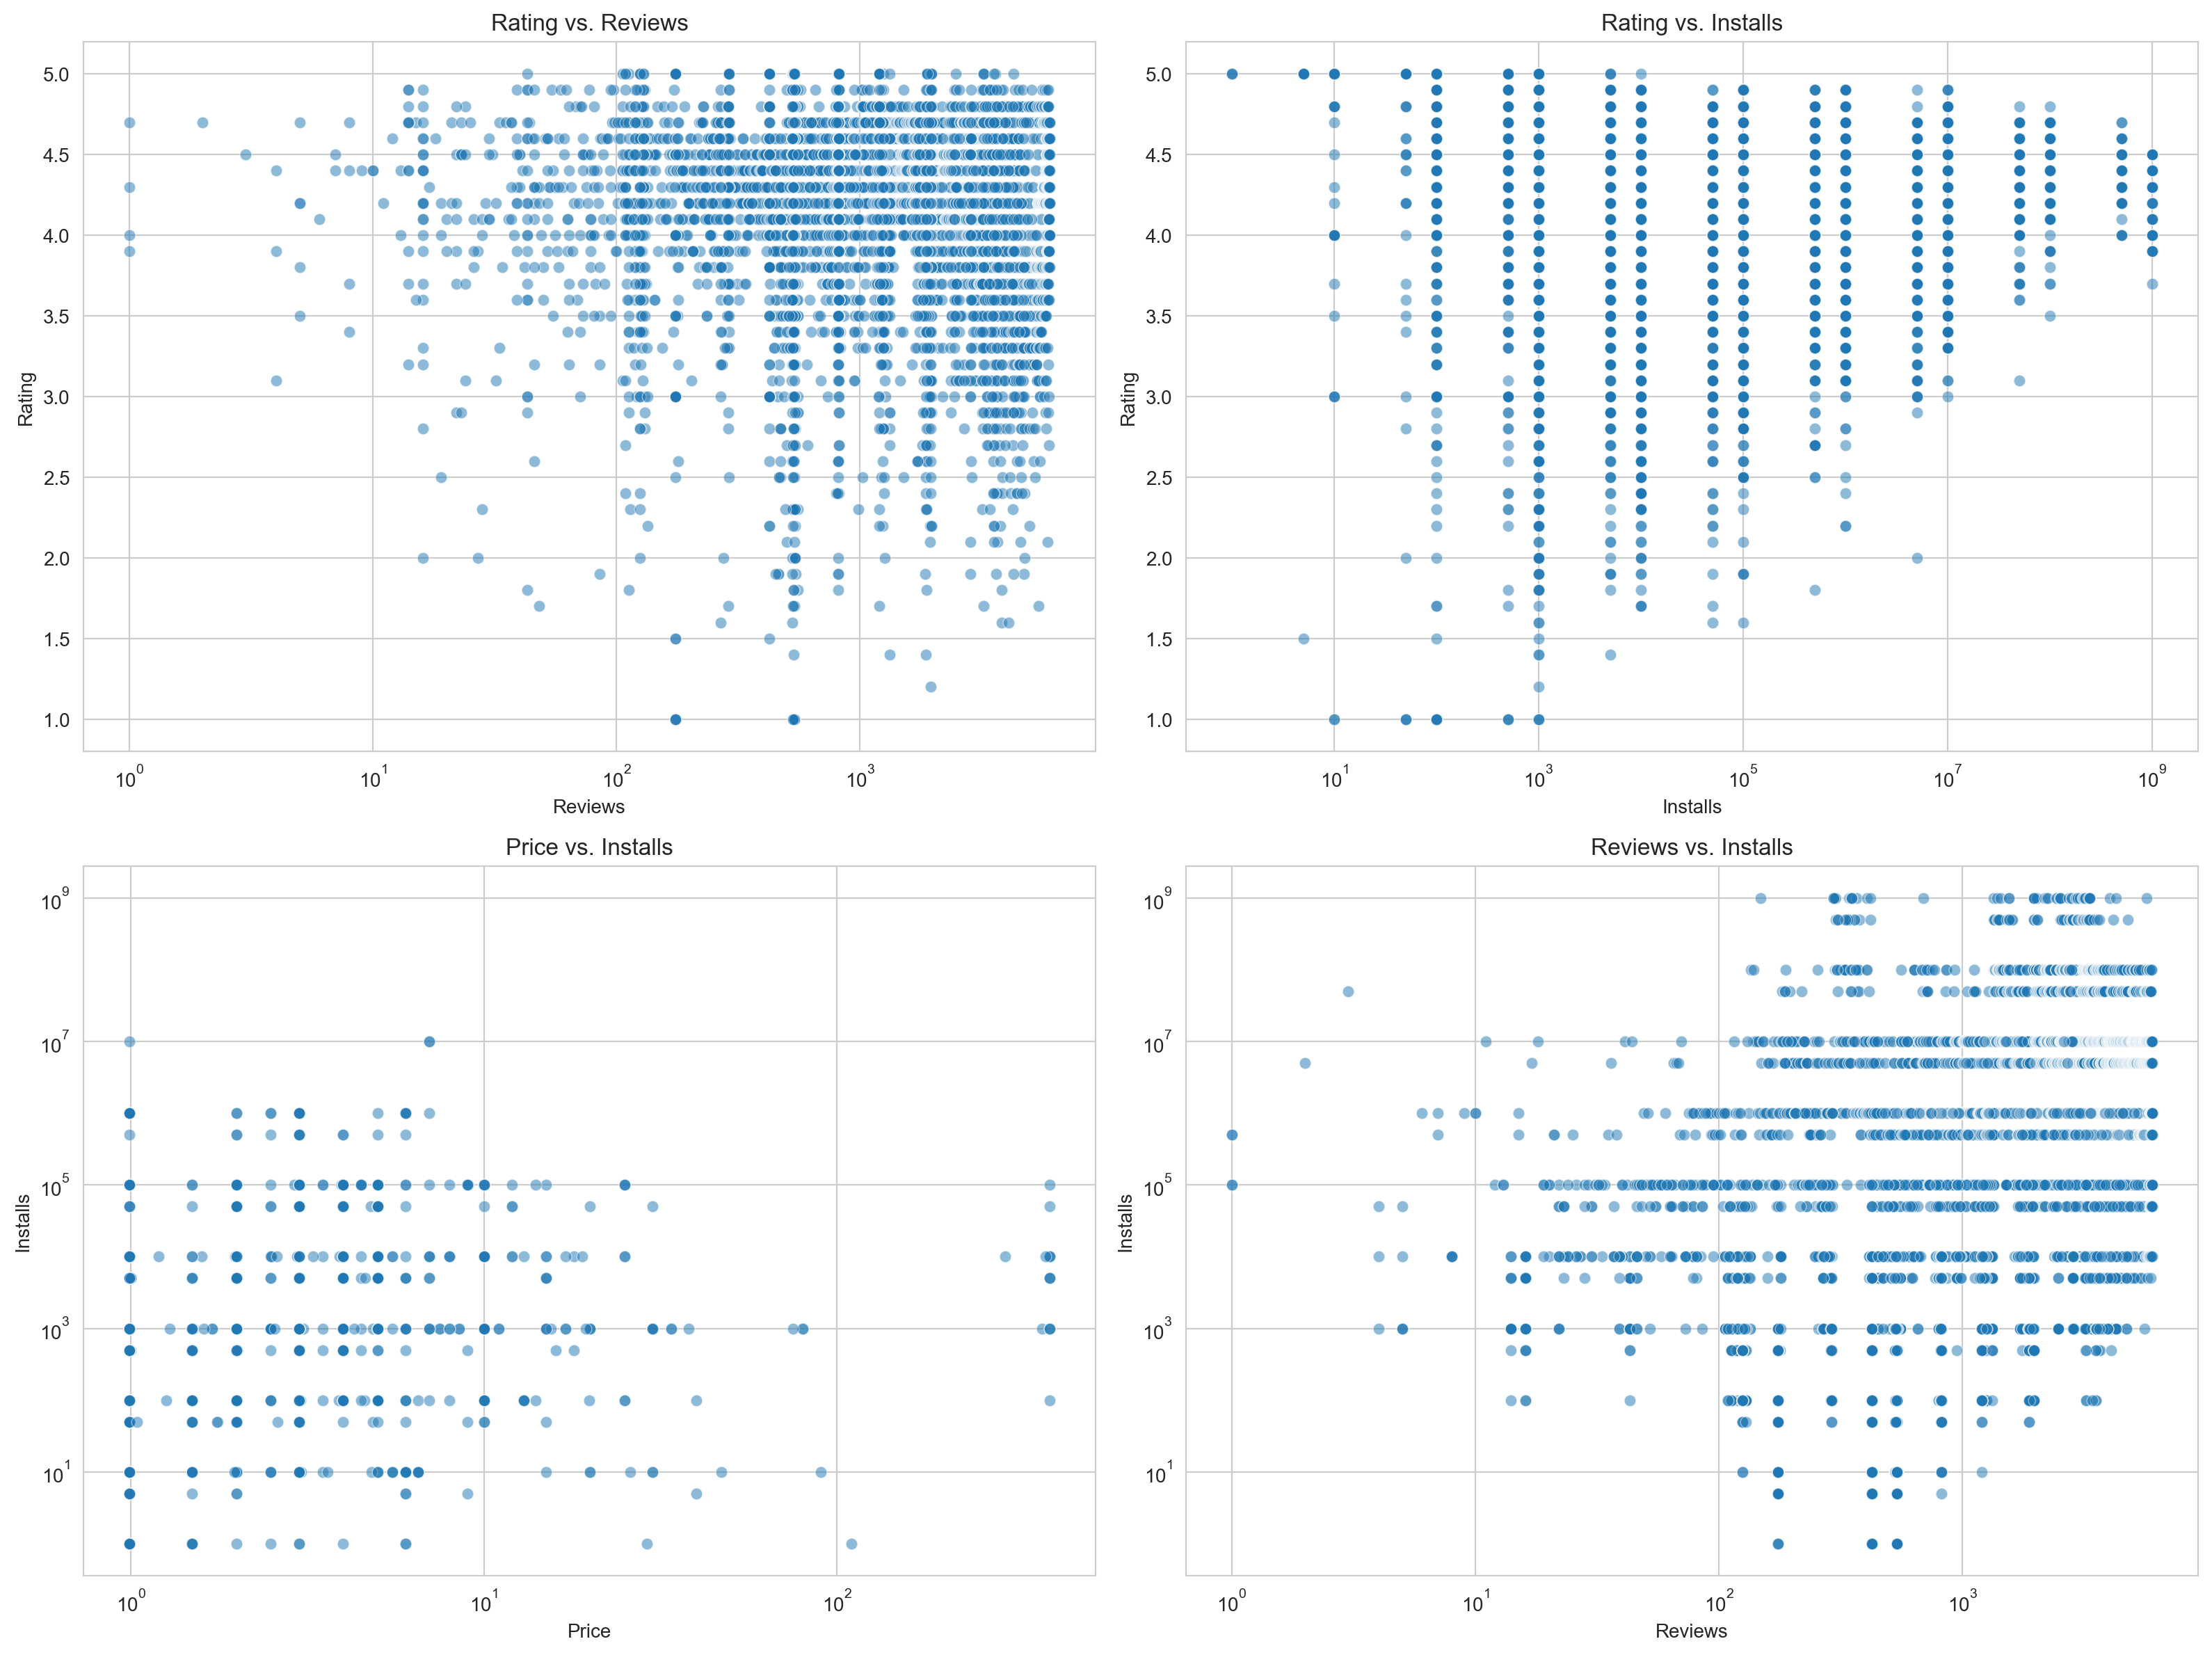

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), dpi=200)

# Rating vs. Reviews
sns.scatterplot(x='Reviews', y='Rating', data=df_cleaned, ax=ax[0, 0], alpha=0.5)
ax[0, 0].set_title('Rating vs. Reviews')
ax[0, 0].set_xlabel('Reviews')
ax[0, 0].set_ylabel('Rating')
ax[0, 0].set_xscale('log')  # Using log scale due to wide range of values

# Rating vs. Installs
sns.scatterplot(x='Installs', y='Rating', data=df_cleaned, ax=ax[0, 1], alpha=0.5)
ax[0, 1].set_title('Rating vs. Installs')
ax[0, 1].set_xlabel('Installs')
ax[0, 1].set_ylabel('Rating')
ax[0, 1].set_xscale('log')  # Using log scale due to wide range of values

# Price vs. Installs
sns.scatterplot(x='Price', y='Installs', data=df_cleaned, ax=ax[1, 0], alpha=0.5)
ax[1, 0].set_title('Price vs. Installs')
ax[1, 0].set_xlabel('Price')
ax[1, 0].set_ylabel('Installs')
ax[1, 0].set_xscale('log')  # Using log scale due to wide range of values
ax[1, 0].set_yscale('log')  # Also log scale for better visualization

# Reviews vs. Installs
sns.scatterplot(x='Reviews', y='Installs', data=df_cleaned, ax=ax[1, 1], alpha=0.5)
ax[1, 1].set_title('Reviews vs. Installs')
ax[1, 1].set_xlabel('Reviews')
ax[1, 1].set_ylabel('Installs')
ax[1, 1].set_xscale('log')  # Using log scale due to wide range of values
ax[1, 1].set_yscale('log')  # Also log scale for better visualization

plt.tight_layout()
plt.show()
